# Multiple CSVs Stock Analysis in Python

# Stock Data Quality Report

Data Quality Report Contents Contents

Task 1 & 2: Load Data and Perform Initial Exploration - loading datasets, as well as displaying the first few rows, getting the number of rows, listing all columns, listing the data types for each column.
Further Inspecting of the Datasets - Creaiting list of values throuhg value.count for all string columns in the trees data set, then got the descriptive statistics for the set, and listing its data types. Then found out if floats are really floats or ints with nulls. Same operations have been performed on the environmental data set. Only unique values have been counted for the common names data set, due to no numeric values in it.

Task 3: Identify Missing Values - This task consists mainly of performing mathematical operations to find missing values in all three data set.

Task 4: Identify Outliers in the Dimensions - Here, the main objective in this task is to find the crazy outliers

Task 5: Identify Duplicates in the Dataset - The main objective of this task was to find out, if there wre any duplicated rows based on the identifier column.

Task 6: Identify Unmatched Data - the main objective of this task is to identify unmatched data for all three data frames.

# importing all libraries 



In [290]:
import matplotlib.pyplot as mplt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from scipy.stats import zscore

# 1.0 General Data Quality Checks


# Creating a Pandas dataframe called trees that contains the contents of the Excel file through pd.read function


In [291]:
apple = pd.read_csv("AAPL_stock_data.csv")
print(apple)

            Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019   37.750080   39.480000   39.712502   38.557499   38.722500   
1     03/01/2019   33.989899   35.547501   36.430000   35.500000   35.994999   
2     04/01/2019   35.440899   37.064999   37.137501   35.950001   36.132500   
3     07/01/2019   35.362022   36.982498   37.207500   36.474998   37.174999   
4     08/01/2019   36.036121   37.687500   37.955002   37.130001   37.389999   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  235.000000  235.000000  236.179993  234.009995  236.179993   
1460  21/10/2024  236.479996  236.479996  236.850006  234.449997  234.449997   
1461  22/10/2024  235.860001  235.860001  236.220001  232.600006  233.889999   
1462  23/10/2024  230.759995  230.759995  235.139999  227.759995  234.080002   
1463  24/10/2024  230.570007  230.570007  230.820007  228.410004  229.979996   

         Volume  
0     148158800  
1  

In [292]:
amazon = pd.read_csv("AMZN_stock_data.csv")
print(amazon)

            Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019   76.956497   76.956497   77.667999   73.046501   73.260002   
1     03/01/2019   75.014000   75.014000   76.900002   74.855499   76.000504   
2     04/01/2019   78.769501   78.769501   79.699997   75.915497   76.500000   
3     07/01/2019   81.475502   81.475502   81.727997   79.459503   80.115501   
4     08/01/2019   82.829002   82.829002   83.830498   80.830498   83.234497   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  188.990005  188.990005  190.740005  186.279999  187.149994   
1460  21/10/2024  189.070007  189.070007  189.460007  186.399994  188.050003   
1461  22/10/2024  189.699997  189.699997  191.520004  186.979996  188.350006   
1462  23/10/2024  184.710007  184.710007  189.160004  183.690002  188.850006   
1463  24/10/2024  186.380005  186.380005  187.110001  183.860001  185.250000   

         Volume  
0     159662000  
1  

In [293]:
google = pd.read_csv("GOOGL_stock_data.csv")
print(google)

            Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019   52.603748   52.734001   53.039501   51.264000   51.360001   
1     03/01/2019   51.146851   51.273499   53.313000   51.118500   52.533501   
2     04/01/2019   53.770355   53.903500   54.000000   51.842999   52.127998   
3     07/01/2019   53.663124   53.796001   54.134998   53.132000   54.048500   
4     08/01/2019   54.134457   54.268501   54.667500   53.417500   54.299999   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  163.419998  163.419998  164.710007  163.080002  163.190002   
1460  21/10/2024  164.070007  164.070007  164.500000  162.619995  162.949997   
1461  22/10/2024  165.139999  165.139999  165.770004  162.979996  162.979996   
1462  23/10/2024  162.779999  162.779999  165.820007  161.929993  164.759995   
1463  24/10/2024  162.720001  162.720001  163.330002  161.009995  162.830002   

        Volume  
0     31868000  
1    

In [294]:
meta = pd.read_csv("META_stock_data.csv")
print(meta)

            Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019  135.272705  135.679993  137.509995  128.559998  128.990005   
1     03/01/2019  131.344543  131.740005  137.169998  131.119995  134.690002   
2     04/01/2019  137.535904  137.949997  138.000000  133.750000  134.009995   
3     07/01/2019  137.635590  138.050003  138.869995  135.910004  137.559998   
4     08/01/2019  142.102142  142.529999  143.139999  139.539993  139.889999   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  576.469971  576.469971  583.969971  575.250000  581.099976   
1460  21/10/2024  575.159973  575.159973  577.239990  569.109985  576.030029   
1461  22/10/2024  582.010010  582.010010  583.530029  572.119995  574.289978   
1462  23/10/2024  563.690002  563.690002  585.000000  562.500000  579.969971   
1463  24/10/2024  567.780029  567.780029  568.880005  561.520019  567.130005   

        Volume  
0     28146200  
1    

In [295]:
msoft = pd.read_csv("MSFT_stock_data.csv")
print(msoft)

            Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019   95.501328  101.120003  101.750000   98.940002   99.550003   
1     03/01/2019   91.988029   97.400002  100.190002   97.199997  100.099998   
2     04/01/2019   96.266319  101.930000  102.510002   98.930000   99.720001   
3     07/01/2019   96.389084  102.059998  103.269997  100.980003  101.639999   
4     08/01/2019   97.087990  102.800003  103.970001  101.709999  103.040001   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  418.160004  418.160004  419.649994  416.260010  417.140015   
1460  21/10/2024  418.779999  418.779999  418.959992  413.750000  416.119995   
1461  22/10/2024  427.510010  427.510010  430.579987  418.040008  418.489990   
1462  23/10/2024  424.600006  424.600006  431.079987  422.529999  430.859985   
1463  24/10/2024  424.730011  424.730011  425.980011  422.399994  425.329987   

        Volume  
0     35329300  
1    

In [296]:
nvdia = pd.read_csv("NVDA_stock_data.csv")
print(nvdia)

            Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019    3.378323    3.405500    3.462000    3.251250    3.266000   
1     03/01/2019    3.174214    3.199750    3.379000    3.192250    3.344750   
2     04/01/2019    3.377579    3.404750    3.443250    3.242500    3.273500   
3     07/01/2019    3.556391    3.585000    3.622250    3.410750    3.462500   
4     08/01/2019    3.467852    3.495750    3.669500    3.422500    3.667250   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  138.000000  138.000000  138.899994  137.279999  138.669998   
1460  21/10/2024  143.710007  143.710007  143.710007  138.000000  138.130005   
1461  22/10/2024  143.589996  143.589996  144.419998  141.779999  142.910004   
1462  23/10/2024  139.559998  139.559998  142.429993  137.460007  142.029999   
1463  24/10/2024  140.410004  140.410004  141.350006  138.460007  140.820007   

         Volume  
0     508752000  
1  

In [297]:
tesla = pd.read_csv("TSLA_stock_data.csv")
print(tesla)

            Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019   20.674667   20.674667   21.008667   19.920000   20.406668   
1     03/01/2019   20.024000   20.024000   20.626667   19.825333   20.466667   
2     04/01/2019   21.179333   21.179333   21.200001   20.181999   20.400000   
3     07/01/2019   22.330668   22.330668   22.449333   21.183332   21.448000   
4     08/01/2019   22.356667   22.356667   22.934000   21.801332   22.797333   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  220.699997  220.699997  222.279999  219.229996  220.710007   
1460  21/10/2024  218.850006  218.850006  220.479996  215.729996  218.899994   
1461  22/10/2024  217.970001  217.970001  218.220001  215.259995  217.309998   
1462  23/10/2024  213.649994  213.649994  218.720001  212.110001  217.130005   
1463  24/10/2024  260.480011  260.480011  262.119995  242.649994  244.679993   

         Volume  
0     174879000  
1  

# Initial Data Exploration 

In [298]:
tesla.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,20.674667,20.674667,21.008667,19.920000,20.406668,174879000
1,03/01/2019,20.024000,20.024000,20.626667,19.825333,20.466667,104478000
2,04/01/2019,21.179333,21.179333,21.200001,20.181999,20.400000,110911500
3,07/01/2019,22.330668,22.330668,22.449333,21.183332,21.448000,113268000
4,08/01/2019,22.356667,22.356667,22.934000,21.801332,22.797333,105127500


In [299]:
tesla.shape

(1464, 7)

In [300]:
tesla.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [301]:
tesla['Open'].value_counts()


285.000000    3
224.220001    2
271.829987    2
241.220001    2
15.983333     2
             ..
193.720001    1
183.353332    1
180.133331    1
167.833328    1
244.679993    1
Name: Open, Length: 1431, dtype: int64

In [302]:
tesla.dtypes

Date          object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object

In [303]:
tesla.describe().round(1)

,Adj Close,Close,High,Low,Open,Volume
count,1464.0,1464.0,1464.0,1464.0,1464.0,1464.0
mean,175.3,175.3,179.3,171.2,175.4,128463671.3
std,101.6,101.6,103.9,99.3,101.7,81291702.7
min,11.9,11.9,12.4,11.8,12.1,29401800.0
25%,65.3,65.3,66.7,63.5,65.7,78681000.0
50%,199.6,199.6,203.3,194.2,199.4,104760800.0
75%,246.4,246.4,251.9,241.9,246.7,150276700.0
max,410.0,410.0,414.5,405.7,411.5,914082000.0


In [304]:
tesla['High'].dtypes

dtype('float64')

In [305]:
tesla['High'].unique

<bound method Series.unique of 0        21.008667
1        20.626667
2        21.200001
3        22.449333
4        22.934000
           ...    
1459    222.279999
1460    220.479996
1461    218.220001
1462    218.720001
1463    262.119995
Name: High, Length: 1464, dtype: float64>

# 2.0 Further Inspection of the Datasets


In [306]:
nvdia.describe().round(1)

,Adj Close,Close,High,Low,Open,Volume
count,1464.0,1464.0,1464.0,1464.0,1464.0,1.464000e+03
mean,29.4,29.4,30.0,28.8,29.4,4.559590e+08
std,32.4,32.4,33.0,31.7,32.4,1.946788e+08
min,3.2,3.2,3.4,3.2,3.3,9.788400e+07
25%,9.1,9.2,9.3,8.9,9.2,3.209786e+08
50%,16.9,17.0,17.3,16.6,16.9,4.262962e+08
75%,31.7,31.7,32.5,31.0,32.0,5.514575e+08
max,143.7,143.7,144.4,141.8,142.9,2.511528e+09


In [307]:
nvdia['Low'].value_counts()

3.581250      2
47.860001     2
4.175500      2
5.959750      2
111.580002    2
             ..
12.868250     1
13.281500     1
13.500000     1
13.388750     1
138.460007    1
Name: Low, Length: 1447, dtype: int64

In [308]:
nvdia['Open'].value_counts()

21.000000     3
22.386999     2
27.229000     2
4.447500      2
12.450000     2
             ..
13.422500     1
13.439750     1
13.088000     1
12.967250     1
140.820007    1
Name: Open, Length: 1438, dtype: int64

In [309]:
nvdia['Close'].value_counts()

5.304250      2
3.719250      2
3.822000      2
13.530500     2
5.240250      2
             ..
12.930750     1
13.350000     1
13.606750     1
13.558250     1
140.410004    1
Name: Close, Length: 1449, dtype: int64

# Descriptive Stats for Numeric Type Columns

Applied the describe() function to obtain the descriptive statistics for the numeric columns. For each column, use the data type as a guide to classify it as discrete or continuous. However, verify whether any float columns are truly floats or just integers with null values by using the pandas.Series.unique() function.

In [310]:
# Getting the descriptive statistics for the numeric columns through the describe function for more clarity.


msoft.describe().round(0)

,Adj Close,Close,High,Low,Open,Volume
count,1464.0,1464.0,1464.0,1464.0,1464.0,1464.0
mean,257.0,262.0,264.0,259.0,262.0,28145663.0
std,94.0,93.0,93.0,92.0,93.0,12169034.0
min,92.0,97.0,100.0,97.0,100.0,8989200.0
25%,187.0,194.0,196.0,191.0,193.0,20318325.0
50%,251.0,256.0,260.0,253.0,257.0,25245250.0
75%,322.0,327.0,330.0,323.0,326.0,32346825.0
max,467.0,468.0,468.0,464.0,467.0,97012700.0


In [311]:
# Checking the data types using the .dtypes method for clarity.

msoft.dtypes

Date          object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object

In [312]:
result = msoft.select_dtypes(include=[int])
print(result)

        Volume
0     35329300
1     42579100
2     44060600
3     35656100
4     31514400
...        ...
1459  17145300
1460  14206100
1461  25482200
1462  19654400
1463  13562400

[1464 rows x 1 columns]


In [313]:
msoft.count

<bound method DataFrame.count of             Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019   95.501328  101.120003  101.750000   98.940002   99.550003   
1     03/01/2019   91.988029   97.400002  100.190002   97.199997  100.099998   
2     04/01/2019   96.266319  101.930000  102.510002   98.930000   99.720001   
3     07/01/2019   96.389084  102.059998  103.269997  100.980003  101.639999   
4     08/01/2019   97.087990  102.800003  103.970001  101.709999  103.040001   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  418.160004  418.160004  419.649994  416.260010  417.140015   
1460  21/10/2024  418.779999  418.779999  418.959992  413.750000  416.119995   
1461  22/10/2024  427.510010  427.510010  430.579987  418.040008  418.489990   
1462  23/10/2024  424.600006  424.600006  431.079987  422.529999  430.859985   
1463  24/10/2024  424.730011  424.730011  425.980011  422.399994  425.329987   

      

In [314]:
# Checking The Data Types: Before filtering, checking the data types of the DataFrame:

print(msoft.dtypes)

Date          object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object


In [315]:
result = msoft.select_dtypes(include=[float])
print(result)

       Adj Close       Close        High         Low        Open
0      95.501328  101.120003  101.750000   98.940002   99.550003
1      91.988029   97.400002  100.190002   97.199997  100.099998
2      96.266319  101.930000  102.510002   98.930000   99.720001
3      96.389084  102.059998  103.269997  100.980003  101.639999
4      97.087990  102.800003  103.970001  101.709999  103.040001
...          ...         ...         ...         ...         ...
1459  418.160004  418.160004  419.649994  416.260010  417.140015
1460  418.779999  418.779999  418.959992  413.750000  416.119995
1461  427.510010  427.510010  430.579987  418.040008  418.489990
1462  424.600006  424.600006  431.079987  422.529999  430.859985
1463  424.730011  424.730011  425.980011  422.399994  425.329987

[1464 rows x 5 columns]


In [316]:
# Selecting Float Columns

result = msoft.select_dtypes(include=[float])
print(result)

       Adj Close       Close        High         Low        Open
0      95.501328  101.120003  101.750000   98.940002   99.550003
1      91.988029   97.400002  100.190002   97.199997  100.099998
2      96.266319  101.930000  102.510002   98.930000   99.720001
3      96.389084  102.059998  103.269997  100.980003  101.639999
4      97.087990  102.800003  103.970001  101.709999  103.040001
...          ...         ...         ...         ...         ...
1459  418.160004  418.160004  419.649994  416.260010  417.140015
1460  418.779999  418.779999  418.959992  413.750000  416.119995
1461  427.510010  427.510010  430.579987  418.040008  418.489990
1462  424.600006  424.600006  431.079987  422.529999  430.859985
1463  424.730011  424.730011  425.980011  422.399994  425.329987

[1464 rows x 5 columns]


# Dropping Nulls 

In [317]:
nvdia.dropna()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,3.378323,3.405500,3.462000,3.251250,3.266000,508752000
1,03/01/2019,3.174214,3.199750,3.379000,3.192250,3.344750,705552000
2,04/01/2019,3.377579,3.404750,3.443250,3.242500,3.273500,585620000
3,07/01/2019,3.556391,3.585000,3.622250,3.410750,3.462500,709160000
4,08/01/2019,3.467852,3.495750,3.669500,3.422500,3.667250,786016000
...,...,...,...,...,...,...,...
1459,18/10/2024,138.000000,138.000000,138.899994,137.279999,138.669998,176090200
1460,21/10/2024,143.710007,143.710007,143.710007,138.000000,138.130005,264554500
1461,22/10/2024,143.589996,143.589996,144.419998,141.779999,142.910004,226311600
1462,23/10/2024,139.559998,139.559998,142.429993,137.460007,142.029999,285930000


In [318]:
nvdia.count

<bound method DataFrame.count of             Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019    3.378323    3.405500    3.462000    3.251250    3.266000   
1     03/01/2019    3.174214    3.199750    3.379000    3.192250    3.344750   
2     04/01/2019    3.377579    3.404750    3.443250    3.242500    3.273500   
3     07/01/2019    3.556391    3.585000    3.622250    3.410750    3.462500   
4     08/01/2019    3.467852    3.495750    3.669500    3.422500    3.667250   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  138.000000  138.000000  138.899994  137.279999  138.669998   
1460  21/10/2024  143.710007  143.710007  143.710007  138.000000  138.130005   
1461  22/10/2024  143.589996  143.589996  144.419998  141.779999  142.910004   
1462  23/10/2024  139.559998  139.559998  142.429993  137.460007  142.029999   
1463  24/10/2024  140.410004  140.410004  141.350006  138.460007  140.820007   

      

In [319]:
apple.dropna()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,37.750080,39.480000,39.712502,38.557499,38.722500,148158800
1,03/01/2019,33.989899,35.547501,36.430000,35.500000,35.994999,365248800
2,04/01/2019,35.440899,37.064999,37.137501,35.950001,36.132500,234428400
3,07/01/2019,35.362022,36.982498,37.207500,36.474998,37.174999,219111200
4,08/01/2019,36.036121,37.687500,37.955002,37.130001,37.389999,164101200
...,...,...,...,...,...,...,...
1459,18/10/2024,235.000000,235.000000,236.179993,234.009995,236.179993,46431500
1460,21/10/2024,236.479996,236.479996,236.850006,234.449997,234.449997,36254500
1461,22/10/2024,235.860001,235.860001,236.220001,232.600006,233.889999,38846600
1462,23/10/2024,230.759995,230.759995,235.139999,227.759995,234.080002,52287000


In [320]:
apple.count

<bound method DataFrame.count of             Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019   37.750080   39.480000   39.712502   38.557499   38.722500   
1     03/01/2019   33.989899   35.547501   36.430000   35.500000   35.994999   
2     04/01/2019   35.440899   37.064999   37.137501   35.950001   36.132500   
3     07/01/2019   35.362022   36.982498   37.207500   36.474998   37.174999   
4     08/01/2019   36.036121   37.687500   37.955002   37.130001   37.389999   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  235.000000  235.000000  236.179993  234.009995  236.179993   
1460  21/10/2024  236.479996  236.479996  236.850006  234.449997  234.449997   
1461  22/10/2024  235.860001  235.860001  236.220001  232.600006  233.889999   
1462  23/10/2024  230.759995  230.759995  235.139999  227.759995  234.080002   
1463  24/10/2024  230.570007  230.570007  230.820007  228.410004  229.979996   

      

In [321]:
amazon.dropna()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,76.956497,76.956497,77.667999,73.046501,73.260002,159662000
1,03/01/2019,75.014000,75.014000,76.900002,74.855499,76.000504,139512000
2,04/01/2019,78.769501,78.769501,79.699997,75.915497,76.500000,183652000
3,07/01/2019,81.475502,81.475502,81.727997,79.459503,80.115501,159864000
4,08/01/2019,82.829002,82.829002,83.830498,80.830498,83.234497,177628000
...,...,...,...,...,...,...,...
1459,18/10/2024,188.990005,188.990005,190.740005,186.279999,187.149994,37417700
1460,21/10/2024,189.070007,189.070007,189.460007,186.399994,188.050003,24639400
1461,22/10/2024,189.699997,189.699997,191.520004,186.979996,188.350006,29650600
1462,23/10/2024,184.710007,184.710007,189.160004,183.690002,188.850006,31937100


In [322]:
amazon.count

<bound method DataFrame.count of             Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019   76.956497   76.956497   77.667999   73.046501   73.260002   
1     03/01/2019   75.014000   75.014000   76.900002   74.855499   76.000504   
2     04/01/2019   78.769501   78.769501   79.699997   75.915497   76.500000   
3     07/01/2019   81.475502   81.475502   81.727997   79.459503   80.115501   
4     08/01/2019   82.829002   82.829002   83.830498   80.830498   83.234497   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  188.990005  188.990005  190.740005  186.279999  187.149994   
1460  21/10/2024  189.070007  189.070007  189.460007  186.399994  188.050003   
1461  22/10/2024  189.699997  189.699997  191.520004  186.979996  188.350006   
1462  23/10/2024  184.710007  184.710007  189.160004  183.690002  188.850006   
1463  24/10/2024  186.380005  186.380005  187.110001  183.860001  185.250000   

      

In [323]:
google.dropna()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,52.603748,52.734001,53.039501,51.264000,51.360001,31868000
1,03/01/2019,51.146851,51.273499,53.313000,51.118500,52.533501,41960000
2,04/01/2019,53.770355,53.903500,54.000000,51.842999,52.127998,46022000
3,07/01/2019,53.663124,53.796001,54.134998,53.132000,54.048500,47446000
4,08/01/2019,54.134457,54.268501,54.667500,53.417500,54.299999,35414000
...,...,...,...,...,...,...,...
1459,18/10/2024,163.419998,163.419998,164.710007,163.080002,163.190002,19757700
1460,21/10/2024,164.070007,164.070007,164.500000,162.619995,162.949997,20946500
1461,22/10/2024,165.139999,165.139999,165.770004,162.979996,162.979996,16568100
1462,23/10/2024,162.779999,162.779999,165.820007,161.929993,164.759995,18280500


In [324]:
google.count

<bound method DataFrame.count of             Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019   52.603748   52.734001   53.039501   51.264000   51.360001   
1     03/01/2019   51.146851   51.273499   53.313000   51.118500   52.533501   
2     04/01/2019   53.770355   53.903500   54.000000   51.842999   52.127998   
3     07/01/2019   53.663124   53.796001   54.134998   53.132000   54.048500   
4     08/01/2019   54.134457   54.268501   54.667500   53.417500   54.299999   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  163.419998  163.419998  164.710007  163.080002  163.190002   
1460  21/10/2024  164.070007  164.070007  164.500000  162.619995  162.949997   
1461  22/10/2024  165.139999  165.139999  165.770004  162.979996  162.979996   
1462  23/10/2024  162.779999  162.779999  165.820007  161.929993  164.759995   
1463  24/10/2024  162.720001  162.720001  163.330002  161.009995  162.830002   

      

In [325]:
meta.dropna

<bound method DataFrame.dropna of             Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019  135.272705  135.679993  137.509995  128.559998  128.990005   
1     03/01/2019  131.344543  131.740005  137.169998  131.119995  134.690002   
2     04/01/2019  137.535904  137.949997  138.000000  133.750000  134.009995   
3     07/01/2019  137.635590  138.050003  138.869995  135.910004  137.559998   
4     08/01/2019  142.102142  142.529999  143.139999  139.539993  139.889999   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  576.469971  576.469971  583.969971  575.250000  581.099976   
1460  21/10/2024  575.159973  575.159973  577.239990  569.109985  576.030029   
1461  22/10/2024  582.010010  582.010010  583.530029  572.119995  574.289978   
1462  23/10/2024  563.690002  563.690002  585.000000  562.500000  579.969971   
1463  24/10/2024  567.780029  567.780029  568.880005  561.520019  567.130005   

     

In [326]:
meta.count

<bound method DataFrame.count of             Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019  135.272705  135.679993  137.509995  128.559998  128.990005   
1     03/01/2019  131.344543  131.740005  137.169998  131.119995  134.690002   
2     04/01/2019  137.535904  137.949997  138.000000  133.750000  134.009995   
3     07/01/2019  137.635590  138.050003  138.869995  135.910004  137.559998   
4     08/01/2019  142.102142  142.529999  143.139999  139.539993  139.889999   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  576.469971  576.469971  583.969971  575.250000  581.099976   
1460  21/10/2024  575.159973  575.159973  577.239990  569.109985  576.030029   
1461  22/10/2024  582.010010  582.010010  583.530029  572.119995  574.289978   
1462  23/10/2024  563.690002  563.690002  585.000000  562.500000  579.969971   
1463  24/10/2024  567.780029  567.780029  568.880005  561.520019  567.130005   

      

In [327]:
msoft.dropna()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,95.501328,101.120003,101.750000,98.940002,99.550003,35329300
1,03/01/2019,91.988029,97.400002,100.190002,97.199997,100.099998,42579100
2,04/01/2019,96.266319,101.930000,102.510002,98.930000,99.720001,44060600
3,07/01/2019,96.389084,102.059998,103.269997,100.980003,101.639999,35656100
4,08/01/2019,97.087990,102.800003,103.970001,101.709999,103.040001,31514400
...,...,...,...,...,...,...,...
1459,18/10/2024,418.160004,418.160004,419.649994,416.260010,417.140015,17145300
1460,21/10/2024,418.779999,418.779999,418.959992,413.750000,416.119995,14206100
1461,22/10/2024,427.510010,427.510010,430.579987,418.040008,418.489990,25482200
1462,23/10/2024,424.600006,424.600006,431.079987,422.529999,430.859985,19654400


In [328]:
msoft.count

<bound method DataFrame.count of             Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019   95.501328  101.120003  101.750000   98.940002   99.550003   
1     03/01/2019   91.988029   97.400002  100.190002   97.199997  100.099998   
2     04/01/2019   96.266319  101.930000  102.510002   98.930000   99.720001   
3     07/01/2019   96.389084  102.059998  103.269997  100.980003  101.639999   
4     08/01/2019   97.087990  102.800003  103.970001  101.709999  103.040001   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  418.160004  418.160004  419.649994  416.260010  417.140015   
1460  21/10/2024  418.779999  418.779999  418.959992  413.750000  416.119995   
1461  22/10/2024  427.510010  427.510010  430.579987  418.040008  418.489990   
1462  23/10/2024  424.600006  424.600006  431.079987  422.529999  430.859985   
1463  24/10/2024  424.730011  424.730011  425.980011  422.399994  425.329987   

      

In [329]:
tesla.dropna()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,20.674667,20.674667,21.008667,19.920000,20.406668,174879000
1,03/01/2019,20.024000,20.024000,20.626667,19.825333,20.466667,104478000
2,04/01/2019,21.179333,21.179333,21.200001,20.181999,20.400000,110911500
3,07/01/2019,22.330668,22.330668,22.449333,21.183332,21.448000,113268000
4,08/01/2019,22.356667,22.356667,22.934000,21.801332,22.797333,105127500
...,...,...,...,...,...,...,...
1459,18/10/2024,220.699997,220.699997,222.279999,219.229996,220.710007,49611900
1460,21/10/2024,218.850006,218.850006,220.479996,215.729996,218.899994,47329000
1461,22/10/2024,217.970001,217.970001,218.220001,215.259995,217.309998,43268700
1462,23/10/2024,213.649994,213.649994,218.720001,212.110001,217.130005,80938900


In [330]:
tesla.count

<bound method DataFrame.count of             Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019   20.674667   20.674667   21.008667   19.920000   20.406668   
1     03/01/2019   20.024000   20.024000   20.626667   19.825333   20.466667   
2     04/01/2019   21.179333   21.179333   21.200001   20.181999   20.400000   
3     07/01/2019   22.330668   22.330668   22.449333   21.183332   21.448000   
4     08/01/2019   22.356667   22.356667   22.934000   21.801332   22.797333   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  220.699997  220.699997  222.279999  219.229996  220.710007   
1460  21/10/2024  218.850006  218.850006  220.479996  215.729996  218.899994   
1461  22/10/2024  217.970001  217.970001  218.220001  215.259995  217.309998   
1462  23/10/2024  213.649994  213.649994  218.720001  212.110001  217.130005   
1463  24/10/2024  260.480011  260.480011  262.119995  242.649994  244.679993   

      

# 3. Identifying missing values


In [331]:

# Finding the percentage of null values through Pandas isnull() and mean() methods.
tesla.isnull().mean()*100

Date         0.0
Adj Close    0.0
Close        0.0
High         0.0
Low          0.0
Open         0.0
Volume       0.0
dtype: float64

In [332]:
# Finding the number of null values through the utilisation of isnull() and sum() functions.
tesla.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [333]:
# Using the isin and sum() functions to find the number of zero values in the trees data set


tesla.isin([0]).mean()*100

Date         0.0
Adj Close    0.0
Close        0.0
High         0.0
Low          0.0
Open         0.0
Volume       0.0
dtype: float64

In [334]:
# Finding the percentage of null and zero values through the use of the isnull, sum, isin functions 
# and the shape method, and also using the arithmetic operators.
(tesla.isnull().sum() + tesla.isin([0]).sum())/tesla.shape[0]

Date         0.0
Adj Close    0.0
Close        0.0
High         0.0
Low          0.0
Open         0.0
Volume       0.0
dtype: float64

In [335]:
# Finding the number of null and zero values utilizing the isnull, sum and isin functions 
# and also using the Pyhton arithmentic operators
(tesla.isnull().sum() + tesla.isin([0]).sum())

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [336]:
# Finding the number of null and zero values utilizing the isnull, sum and isin functions 
# and also using the Pyhton arithmentic operators
(tesla.isnull().sum() + tesla.isin([0]).sum())

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

So far the data set is with an amazing quality.

Apart of couple int columns here an there there is almost no discrepancies

# 4.0 Finding the outliers in the Stocks Dataset


# Outliers for Apple

In [337]:
# Geting the descriptive stats for the numeric columns, as well as 'round()'-ing them to 1 point after the decimal.
apple.describe().round(2)

,Adj Close,Close,High,Low,Open,Volume
count,1464.00,1464.00,1464.00,1464.00,1464.00,1.464000e+03
mean,132.21,133.91,135.26,132.41,133.78,9.570047e+07
std,51.91,51.52,51.93,51.06,51.51,5.231367e+07
min,33.99,35.55,36.43,35.50,35.99,2.404830e+07
25%,85.63,87.78,88.35,86.26,87.71,6.078342e+07
50%,142.56,144.54,146.38,142.65,144.00,8.323135e+07
75%,171.06,172.58,173.86,170.83,172.27,1.135270e+08
max,236.48,236.48,237.49,234.45,236.48,4.265100e+08


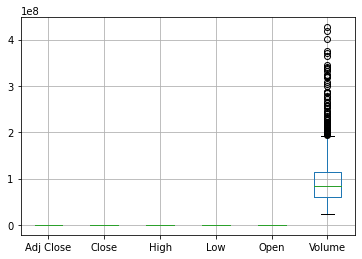

In [338]:
# checking for outliers

apple.boxplot()
mplt.show()

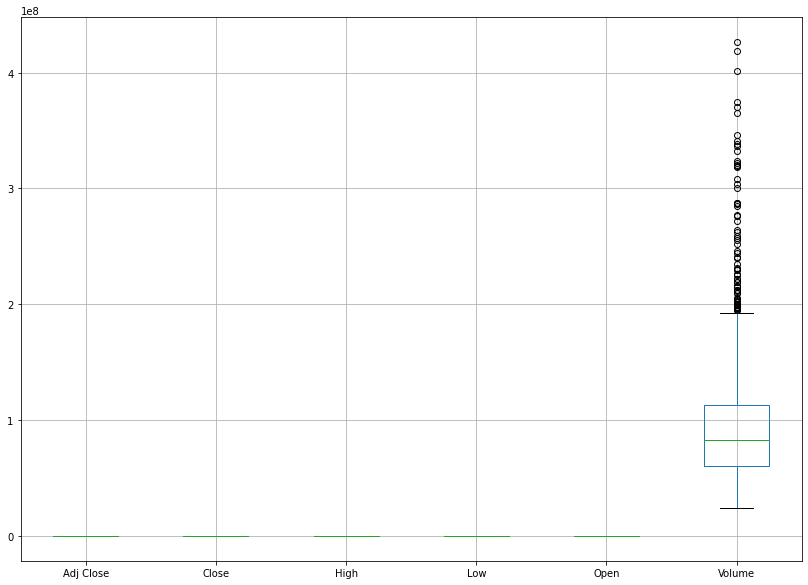

In [339]:
# Assuming 'stocks' is your DataFrame
fig, ax = mplt.subplots(figsize=(14, 10))  # Adjust these numbers to change the size
apple.boxplot(ax=ax)
mplt.show()

- finidning the outliers

In [340]:
#Using the Interquartile Range (IQR) method:

Q1 = apple.quantile(0.25)
Q3 = apple.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

appl_outliers = apple[(apple < lower_bound) | (apple > upper_bound)]

/var/folders/db/969qtqpd5tqcq7cgtpqtnyhh0000gn/T/ipykernel_2782/870858186.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  appl_outliers = apple[(apple < lower_bound) | (apple > upper_bound)]


In [341]:
appl_outliers

,Date,Adj Close,Close,High,Low,Open,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,365248800.0
2,NaN,NaN,NaN,NaN,NaN,NaN,234428400.0
3,NaN,NaN,NaN,NaN,NaN,NaN,219111200.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Outliers for Amazon

In [342]:
# Geting the descriptive stats for the numeric columns, as well as 'round()'-ing them to 1 point after the decimal.
amazon.describe().round(2)

,Adj Close,Close,High,Low,Open,Volume
count,1464.00,1464.00,1464.00,1464.00,1464.00,1.464000e+03
mean,134.81,134.81,136.43,133.13,134.84,7.088757e+07
std,34.19,34.19,34.53,33.90,34.27,3.386558e+07
min,75.01,75.01,76.90,73.05,73.26,1.762600e+07
25%,98.24,98.24,99.67,96.92,98.23,4.849152e+07
50%,138.04,138.04,139.65,136.13,138.62,6.238325e+07
75%,164.80,164.80,166.51,163.09,165.03,8.447200e+07
max,200.00,200.00,201.20,199.05,200.09,3.113460e+08


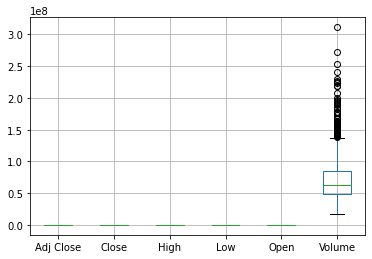

In [343]:
# checking for outliers

amazon.boxplot()
mplt.show()

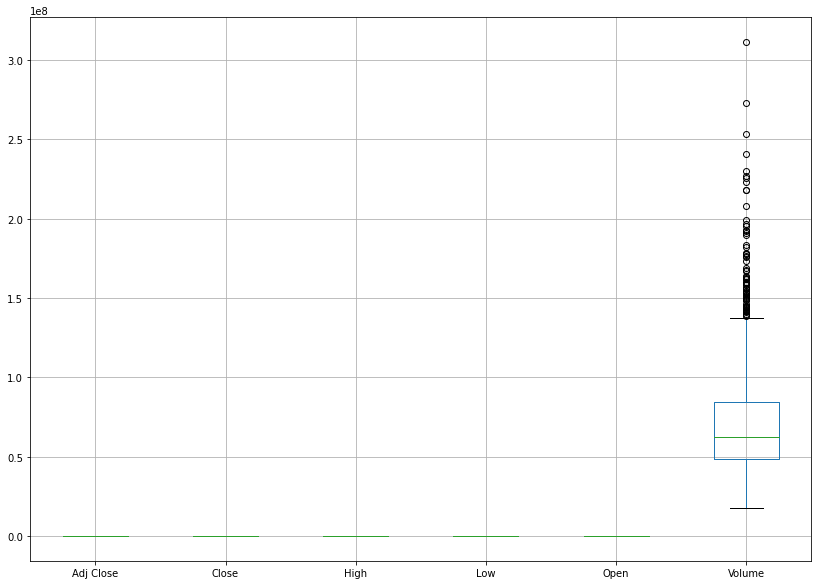

In [344]:
# Assuming 'stocks' is your DataFrame
fig, ax = mplt.subplots(figsize=(14, 10))  # Adjust these numbers to change the size
amazon.boxplot(ax=ax)
mplt.show()

In [345]:

Q1 = amazon.quantile(0.25)
Q3 = amazon.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

amzn_outliers = amazon[(amazon < lower_bound) | (amazon > upper_bound)]


/var/folders/db/969qtqpd5tqcq7cgtpqtnyhh0000gn/T/ipykernel_2782/223465938.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  amzn_outliers = amazon[(amazon < lower_bound) | (amazon > upper_bound)]


In [346]:
amzn_outliers

,Date,Adj Close,Close,High,Low,Open,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,159662000.0
1,NaN,NaN,NaN,NaN,NaN,NaN,139512000.0
2,NaN,NaN,NaN,NaN,NaN,NaN,183652000.0
3,NaN,NaN,NaN,NaN,NaN,NaN,159864000.0
4,NaN,NaN,NaN,NaN,NaN,NaN,177628000.0
...,...,...,...,...,...,...,...
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Outliers for Google

In [347]:
# Geting the descriptive stats for the numeric columns, as well as 'round()'-ing them to 1 point after the decimal.
google.describe().round(2)

,Adj Close,Close,High,Low,Open,Volume
count,1464.00,1464.00,1464.00,1464.00,1464.00,1.464000e+03
mean,106.70,106.94,108.07,105.76,106.88,3.269600e+07
std,35.35,35.41,35.75,35.10,35.44,1.462116e+07
min,51.15,51.27,52.50,50.44,51.36,9.312000e+06
25%,72.73,72.91,73.65,72.25,73.03,2.342025e+07
50%,107.08,107.34,108.24,105.19,106.81,2.894405e+07
75%,135.76,136.10,137.23,134.73,136.03,3.703050e+07
max,190.93,191.18,191.75,189.03,190.31,1.331780e+08


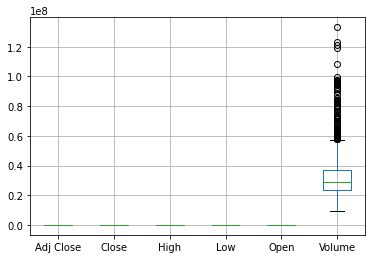

In [348]:
# checking for outliers

google.boxplot()
mplt.show()

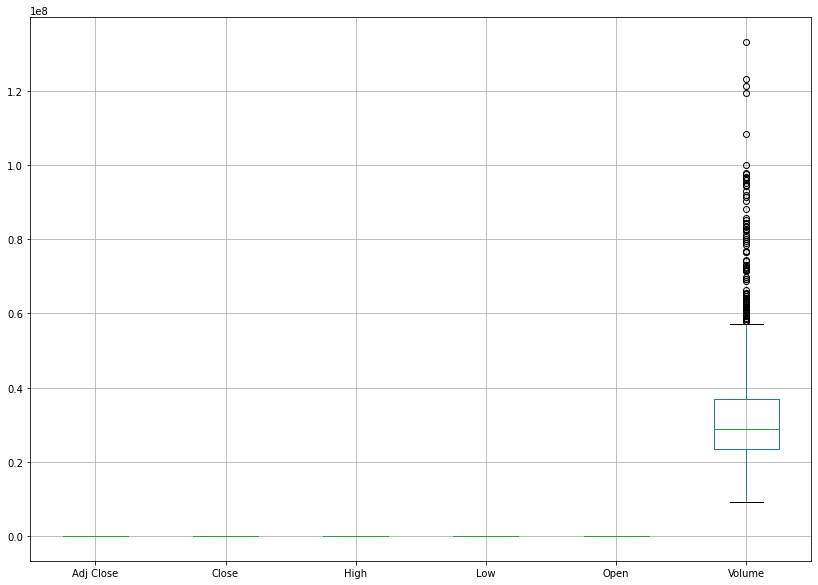

In [349]:
# Assuming 'stocks' is your DataFrame
fig, ax = mplt.subplots(figsize=(14, 10))  # Adjust these numbers to change the size
google.boxplot(ax=ax)
mplt.show()

In [350]:
#Using the Interquartile Range (IQR) method:

Q1 = google.quantile(0.25)
Q3 = google.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

googl_outliers = google[(google < lower_bound) | (google > upper_bound)]

/var/folders/db/969qtqpd5tqcq7cgtpqtnyhh0000gn/T/ipykernel_2782/808260972.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  googl_outliers = google[(google < lower_bound) | (google > upper_bound)]


In [351]:
googl_outliers

,Date,Adj Close,Close,High,Low,Open,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Outliers for META

In [352]:
# Geting the descriptive stats for the numeric columns, as well as 'round()'-ing them to 1 point after the decimal.
meta.describe().round(2)

,Adj Close,Close,High,Low,Open,Volume
count,1464.00,1464.00,1464.00,1464.00,1464.00,1.464000e+03
mean,271.05,271.76,275.36,268.05,271.60,2.227208e+07
std,111.47,111.56,112.67,110.41,111.64,1.509005e+07
min,88.64,88.91,90.46,88.09,90.08,5.467500e+06
25%,185.65,186.21,189.00,183.89,186.51,1.377688e+07
50%,249.71,250.46,254.49,247.60,250.87,1.873975e+07
75%,328.17,329.16,332.88,324.89,328.75,2.597595e+07
max,595.94,595.94,602.95,589.96,598.22,2.323166e+08


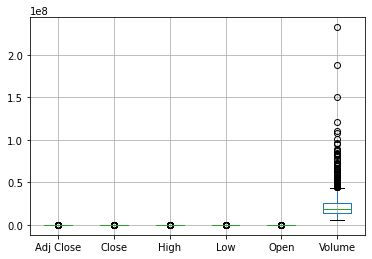

In [353]:
 # checking for outliers

meta.boxplot()
mplt.show()

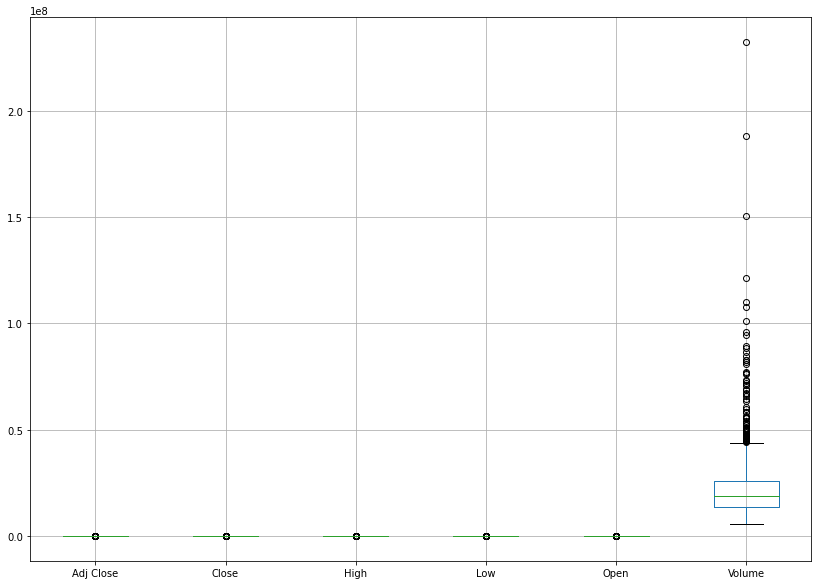

In [354]:
# Assuming 'stocks' is your DataFrame
fig, ax = mplt.subplots(figsize=(14, 10))  # Adjust these numbers to change the size
meta.boxplot(ax=ax)
mplt.show()

In [355]:
#Using the Interquartile Range (IQR) method:

Q1 = meta.quantile(0.25)
Q3 = meta.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

meta_outliers = meta[(meta < lower_bound) | (meta > upper_bound)]

/var/folders/db/969qtqpd5tqcq7cgtpqtnyhh0000gn/T/ipykernel_2782/1781040785.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  meta_outliers = meta[(meta < lower_bound) | (meta > upper_bound)]


In [356]:
meta_outliers

,Date,Adj Close,Close,High,Low,Open,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1459,NaN,576.469971,576.469971,583.969971,575.250000,581.099976,NaN
1460,NaN,575.159973,575.159973,577.239990,569.109985,576.030029,NaN
1461,NaN,582.010010,582.010010,583.530029,572.119995,574.289978,NaN
1462,NaN,563.690002,563.690002,585.000000,562.500000,579.969971,NaN


# Outliers for MSFT

In [357]:
# Geting the descriptive stats for the numeric columns, as well as 'round()'-ing them to 1 point after the decimal.
msoft.describe().round(2)

,Adj Close,Close,High,Low,Open,Volume
count,1464.00,1464.00,1464.00,1464.00,1464.00,1464.00
mean,256.81,261.89,264.37,259.15,261.83,28145662.57
std,94.12,92.53,93.16,91.84,92.61,12169033.96
min,91.99,97.40,100.19,97.20,99.55,8989200.00
25%,187.03,194.07,196.18,191.35,193.07,20318325.00
50%,251.01,255.99,259.64,253.35,256.59,25245250.00
75%,322.03,326.84,329.91,323.22,326.00,32346825.00
max,466.72,467.56,468.35,464.46,467.00,97012700.00


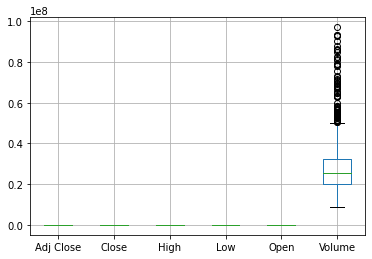

In [358]:
# checking for outliers

msoft.boxplot()
mplt.show()

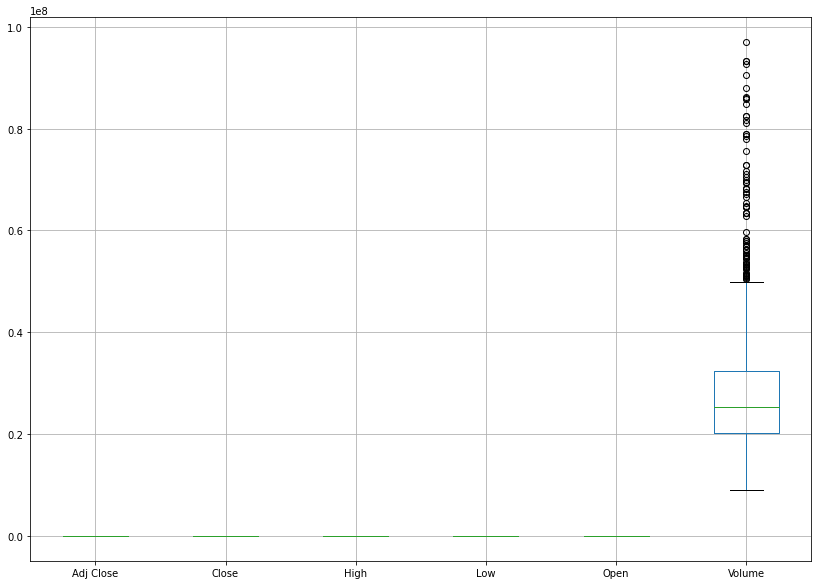

In [359]:
# Assuming 'stocks' is your DataFrame
fig, ax = mplt.subplots(figsize=(14, 10))  # Adjust these numbers to change the size
msoft.boxplot(ax=ax)
mplt.show()

In [360]:
#Using the Interquartile Range (IQR) method:

Q1 = msoft.quantile(0.25)
Q3 = msoft.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

msoft_outliers = msoft[(msoft < lower_bound) | (msoft > upper_bound)]

/var/folders/db/969qtqpd5tqcq7cgtpqtnyhh0000gn/T/ipykernel_2782/3783550257.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  msoft_outliers = msoft[(msoft < lower_bound) | (msoft > upper_bound)]


In [361]:
msoft_outliers

,Date,Adj Close,Close,High,Low,Open,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Outliers for NVDA

In [362]:
nvdia.describe().round(2)

,Adj Close,Close,High,Low,Open,Volume
count,1464.00,1464.00,1464.00,1464.00,1464.00,1.464000e+03
mean,29.40,29.42,29.97,28.81,29.41,4.559590e+08
std,32.42,32.42,33.05,31.72,32.44,1.946788e+08
min,3.17,3.20,3.38,3.19,3.27,9.788400e+07
25%,9.14,9.17,9.27,8.90,9.17,3.209786e+08
50%,16.94,16.96,17.29,16.58,16.90,4.262962e+08
75%,31.67,31.69,32.46,30.95,32.00,5.514575e+08
max,143.71,143.71,144.42,141.78,142.91,2.511528e+09


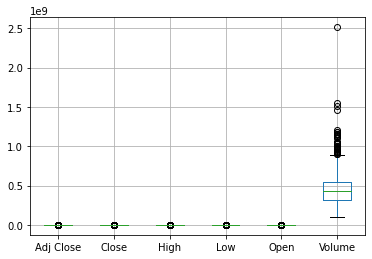

In [363]:
# checking for outliers

nvdia.boxplot()
mplt.show()

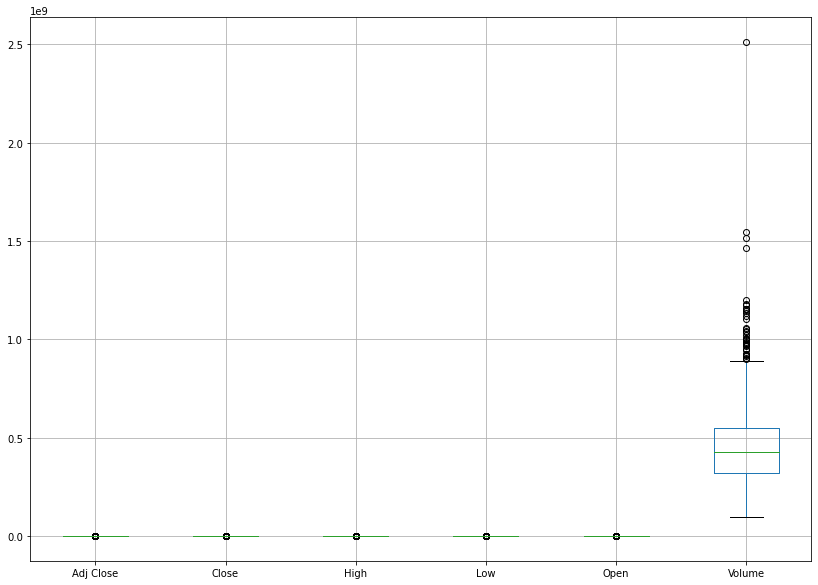

In [364]:
# Assuming 'stocks' is your DataFrame
fig, ax = mplt.subplots(figsize=(14, 10))  # Adjust these numbers to change the size
nvdia.boxplot(ax=ax)
mplt.show()

In [365]:
#Using the Interquartile Range (IQR) method:

Q1 = nvdia.quantile(0.25)
Q3 = nvdia.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

nvdia_outliers = nvdia[(nvdia < lower_bound) | (nvdia > upper_bound)]

/var/folders/db/969qtqpd5tqcq7cgtpqtnyhh0000gn/T/ipykernel_2782/851048052.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  nvdia_outliers = nvdia[(nvdia < lower_bound) | (nvdia > upper_bound)]


In [366]:
nvdia_outliers

,Date,Adj Close,Close,High,Low,Open,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1459,NaN,138.000000,138.000000,138.899994,137.279999,138.669998,NaN
1460,NaN,143.710007,143.710007,143.710007,138.000000,138.130005,NaN
1461,NaN,143.589996,143.589996,144.419998,141.779999,142.910004,NaN
1462,NaN,139.559998,139.559998,142.429993,137.460007,142.029999,NaN


# Outliers for Tesla

In [367]:
tesla.describe().round(2)

,Adj Close,Close,High,Low,Open,Volume
count,1464.00,1464.00,1464.00,1464.00,1464.00,1.464000e+03
mean,175.34,175.34,179.27,171.22,175.38,1.284637e+08
std,101.58,101.58,103.88,99.27,101.71,8.129170e+07
min,11.93,11.93,12.45,11.80,12.07,2.940180e+07
25%,65.32,65.32,66.69,63.47,65.72,7.868100e+07
50%,199.64,199.64,203.27,194.22,199.43,1.047608e+08
75%,246.41,246.41,251.90,241.90,246.75,1.502767e+08
max,409.97,409.97,414.50,405.67,411.47,9.140820e+08


[]

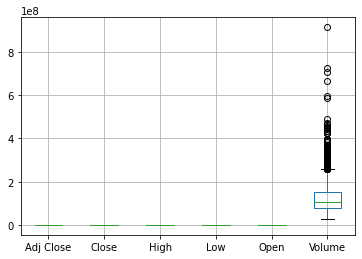

In [368]:
tesla.boxplot()
mplt.plot()

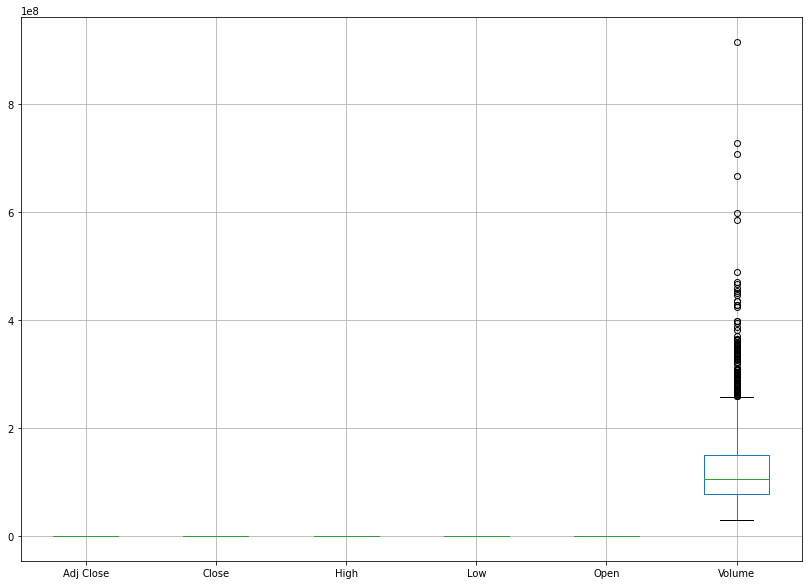

In [369]:
# Assuming 'stocks' is your DataFrame
fig, ax = mplt.subplots(figsize=(14, 10))  # Adjust these numbers to change the size
tesla.boxplot(ax=ax)
mplt.show()

In [370]:
#Using the Interquartile Range (IQR) method:

Q1 = tesla.quantile(0.25)
Q3 = tesla.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

tsla_outliers = tesla[(tesla < lower_bound) | (tesla > upper_bound)]

/var/folders/db/969qtqpd5tqcq7cgtpqtnyhh0000gn/T/ipykernel_2782/3667263912.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  tsla_outliers = tesla[(tesla < lower_bound) | (tesla > upper_bound)]


In [371]:
tsla_outliers

,Date,Adj Close,Close,High,Low,Open,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Printing all outliers in one function

In [372]:
def all_out(appl_outliers, amzn_outliers, googl_outliers, meta_outliers, msft_outliers, nvdia_outliers,tsla_outliers):
    print("\n=== OUTLIER SUMMARY ===")
    print("-----------------------")
    
    print(f"\nOutlier Set 1: {appl_outliers}")
    print(f"Outlier Set 2: {amzn_outliers}")
    print(f"Outlier Set 3: {googl_outliers}")
    print(f"Outlier Set 4: {meta_outliers}")
    print(f"Outlier Set 5: {msft_outliers}")
    print(f"Outlier Set 6: {nvdia_outliers}")
    print(f"Outlier Set 7: {tsla_outliers}")
    print("\n-----------------------")


all_out(appl_outliers, amzn_outliers, googl_outliers, meta_outliers, msft_outliers, nvdia_outliers,tsla_outliers) 


=== OUTLIER SUMMARY ===
-----------------------

Outlier Set 1:      Date  Adj Close  Close  High  Low  Open       Volume
0     NaN        NaN    NaN   NaN  NaN   NaN          NaN
1     NaN        NaN    NaN   NaN  NaN   NaN  365248800.0
2     NaN        NaN    NaN   NaN  NaN   NaN  234428400.0
3     NaN        NaN    NaN   NaN  NaN   NaN  219111200.0
4     NaN        NaN    NaN   NaN  NaN   NaN          NaN
...   ...        ...    ...   ...  ...   ...          ...
1459  NaN        NaN    NaN   NaN  NaN   NaN          NaN
1460  NaN        NaN    NaN   NaN  NaN   NaN          NaN
1461  NaN        NaN    NaN   NaN  NaN   NaN          NaN
1462  NaN        NaN    NaN   NaN  NaN   NaN          NaN
1463  NaN        NaN    NaN   NaN  NaN   NaN          NaN

[1464 rows x 7 columns]
Outlier Set 2:      Date  Adj Close  Close  High  Low  Open       Volume
0     NaN        NaN    NaN   NaN  NaN   NaN  159662000.0
1     NaN        NaN    NaN   NaN  NaN   NaN  139512000.0
2     NaN        NaN    N

In [373]:
def all_outliers(**outliers):
    print("\n=== OUTLIER SUMMARY ===")
    print("-----------------------")
    
    for name, values in outliers.items():
        print(f"\n{name}: {values}")
    
    print("\n-----------------------")

# Call it with your specific outlier variables:
all_outliers(
    AAPL=appl_outliers,
    AMZN=amzn_outliers,
    GOOGL=googl_outliers,
    META=meta_outliers,
    MSFT=msft_outliers,
    NVDIA=nvdia_outliers,
    TSLA=tsla_outliers
)



=== OUTLIER SUMMARY ===
-----------------------

AAPL:      Date  Adj Close  Close  High  Low  Open       Volume
0     NaN        NaN    NaN   NaN  NaN   NaN          NaN
1     NaN        NaN    NaN   NaN  NaN   NaN  365248800.0
2     NaN        NaN    NaN   NaN  NaN   NaN  234428400.0
3     NaN        NaN    NaN   NaN  NaN   NaN  219111200.0
4     NaN        NaN    NaN   NaN  NaN   NaN          NaN
...   ...        ...    ...   ...  ...   ...          ...
1459  NaN        NaN    NaN   NaN  NaN   NaN          NaN
1460  NaN        NaN    NaN   NaN  NaN   NaN          NaN
1461  NaN        NaN    NaN   NaN  NaN   NaN          NaN
1462  NaN        NaN    NaN   NaN  NaN   NaN          NaN
1463  NaN        NaN    NaN   NaN  NaN   NaN          NaN

[1464 rows x 7 columns]

AMZN:      Date  Adj Close  Close  High  Low  Open       Volume
0     NaN        NaN    NaN   NaN  NaN   NaN  159662000.0
1     NaN        NaN    NaN   NaN  NaN   NaN  139512000.0
2     NaN        NaN    NaN   NaN  NaN   N

# 5.0 Identifying Duplicates in the dataset


In [374]:
tesla.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
1459    False
1460    False
1461    False
1462    False
1463    False
Length: 1464, dtype: bool

In [375]:
tesla.duplicated().value_counts()


False    1464
dtype: int64

In [376]:
tesla.duplicated().sum()


0

In [377]:
tesla.duplicated(keep=False)


0       False
1       False
2       False
3       False
4       False
        ...  
1459    False
1460    False
1461    False
1462    False
1463    False
Length: 1464, dtype: bool

In [378]:
tesla.loc[tesla.duplicated(keep=False)]


,Date,Adj Close,Close,High,Low,Open,Volume


# Unifying all files

In [379]:
apple.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,37.750080,39.480000,39.712502,38.557499,38.722500,148158800
1,03/01/2019,33.989899,35.547501,36.430000,35.500000,35.994999,365248800
2,04/01/2019,35.440899,37.064999,37.137501,35.950001,36.132500,234428400
3,07/01/2019,35.362022,36.982498,37.207500,36.474998,37.174999,219111200
4,08/01/2019,36.036121,37.687500,37.955002,37.130001,37.389999,164101200


In [380]:
amazon.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,76.956497,76.956497,77.667999,73.046501,73.260002,159662000
1,03/01/2019,75.014000,75.014000,76.900002,74.855499,76.000504,139512000
2,04/01/2019,78.769501,78.769501,79.699997,75.915497,76.500000,183652000
3,07/01/2019,81.475502,81.475502,81.727997,79.459503,80.115501,159864000
4,08/01/2019,82.829002,82.829002,83.830498,80.830498,83.234497,177628000


In [381]:
google.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,52.603748,52.734001,53.039501,51.264000,51.360001,31868000
1,03/01/2019,51.146851,51.273499,53.313000,51.118500,52.533501,41960000
2,04/01/2019,53.770355,53.903500,54.000000,51.842999,52.127998,46022000
3,07/01/2019,53.663124,53.796001,54.134998,53.132000,54.048500,47446000
4,08/01/2019,54.134457,54.268501,54.667500,53.417500,54.299999,35414000


In [382]:
meta.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,135.272705,135.679993,137.509995,128.559998,128.990005,28146200
1,03/01/2019,131.344543,131.740005,137.169998,131.119995,134.690002,22717900
2,04/01/2019,137.535904,137.949997,138.000000,133.750000,134.009995,29002100
3,07/01/2019,137.635590,138.050003,138.869995,135.910004,137.559998,20089300
4,08/01/2019,142.102142,142.529999,143.139999,139.539993,139.889999,26263800


In [383]:
msoft.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,95.501328,101.120003,101.750000,98.940002,99.550003,35329300
1,03/01/2019,91.988029,97.400002,100.190002,97.199997,100.099998,42579100
2,04/01/2019,96.266319,101.930000,102.510002,98.930000,99.720001,44060600
3,07/01/2019,96.389084,102.059998,103.269997,100.980003,101.639999,35656100
4,08/01/2019,97.087990,102.800003,103.970001,101.709999,103.040001,31514400


In [384]:
nvdia.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,3.378323,3.40550,3.46200,3.25125,3.26600,508752000
1,03/01/2019,3.174214,3.19975,3.37900,3.19225,3.34475,705552000
2,04/01/2019,3.377579,3.40475,3.44325,3.24250,3.27350,585620000
3,07/01/2019,3.556391,3.58500,3.62225,3.41075,3.46250,709160000
4,08/01/2019,3.467852,3.49575,3.66950,3.42250,3.66725,786016000


In [385]:
tesla.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,02/01/2019,20.674667,20.674667,21.008667,19.920000,20.406668,174879000
1,03/01/2019,20.024000,20.024000,20.626667,19.825333,20.466667,104478000
2,04/01/2019,21.179333,21.179333,21.200001,20.181999,20.400000,110911500
3,07/01/2019,22.330668,22.330668,22.449333,21.183332,21.448000,113268000
4,08/01/2019,22.356667,22.356667,22.934000,21.801332,22.797333,105127500


In [386]:
# Creating a list of DataFrames called dfs

dfs = [apple, amazon, google, meta, msoft, nvdia, tesla ]

dfs

[            Date   Adj Close       Close        High         Low        Open  \
 0     02/01/2019   37.750080   39.480000   39.712502   38.557499   38.722500   
 1     03/01/2019   33.989899   35.547501   36.430000   35.500000   35.994999   
 2     04/01/2019   35.440899   37.064999   37.137501   35.950001   36.132500   
 3     07/01/2019   35.362022   36.982498   37.207500   36.474998   37.174999   
 4     08/01/2019   36.036121   37.687500   37.955002   37.130001   37.389999   
 ...          ...         ...         ...         ...         ...         ...   
 1459  18/10/2024  235.000000  235.000000  236.179993  234.009995  236.179993   
 1460  21/10/2024  236.479996  236.479996  236.850006  234.449997  234.449997   
 1461  22/10/2024  235.860001  235.860001  236.220001  232.600006  233.889999   
 1462  23/10/2024  230.759995  230.759995  235.139999  227.759995  234.080002   
 1463  24/10/2024  230.570007  230.570007  230.820007  228.410004  229.979996   
 
          Volume  
 0     

# Creating an additional collums Moving Average e.g. MA50 and MA200

In [387]:
for df in dfs:
    df['MA50'] = df.Close.rolling(50).mean()
    df['MA200'] = df.Close.rolling(200).mean()

print(dfs)
'''
COde break down:

for df in dfs - This is looping through a list of dataframes (presumably dfs contains multiple dataframes)

df['MA50'] - This creates a new column named 'MA50' in each dataframe

df.Close.rolling(50).mean() - This is calculating a 50-day Moving Average:

df.Close accesses the 'Close' price column
.rolling(50) creates a rolling window of 50 days
.mean() calculates the average of those 50 days 
'''


[            Date   Adj Close       Close        High         Low        Open  \
0     02/01/2019   37.750080   39.480000   39.712502   38.557499   38.722500   
1     03/01/2019   33.989899   35.547501   36.430000   35.500000   35.994999   
2     04/01/2019   35.440899   37.064999   37.137501   35.950001   36.132500   
3     07/01/2019   35.362022   36.982498   37.207500   36.474998   37.174999   
4     08/01/2019   36.036121   37.687500   37.955002   37.130001   37.389999   
...          ...         ...         ...         ...         ...         ...   
1459  18/10/2024  235.000000  235.000000  236.179993  234.009995  236.179993   
1460  21/10/2024  236.479996  236.479996  236.850006  234.449997  234.449997   
1461  22/10/2024  235.860001  235.860001  236.220001  232.600006  233.889999   
1462  23/10/2024  230.759995  230.759995  235.139999  227.759995  234.080002   
1463  24/10/2024  230.570007  230.570007  230.820007  228.410004  229.979996   

         Volume      MA50      MA200  

"\nCOde break down:\n\nfor df in dfs - This is looping through a list of dataframes (presumably dfs contains multiple dataframes)\n\ndf['MA50'] - This creates a new column named 'MA50' in each dataframe\n\ndf.Close.rolling(50).mean() - This is calculating a 50-day Moving Average:\n\ndf.Close accesses the 'Close' price column\n.rolling(50) creates a rolling window of 50 days\n.mean() calculates the average of those 50 days \n"

In [388]:
# Using the head function to display the first few rows
tesla.head(200)

,Date,Adj Close,Close,High,Low,Open,Volume,MA50,MA200
0,02/01/2019,20.674667,20.674667,21.008667,19.920000,20.406668,174879000,NaN,NaN
1,03/01/2019,20.024000,20.024000,20.626667,19.825333,20.466667,104478000,NaN,NaN
2,04/01/2019,21.179333,21.179333,21.200001,20.181999,20.400000,110911500,NaN,NaN
3,07/01/2019,22.330668,22.330668,22.449333,21.183332,21.448000,113268000,NaN,NaN
4,08/01/2019,22.356667,22.356667,22.934000,21.801332,22.797333,105127500,NaN,NaN
...,...,...,...,...,...,...,...,...,...
195,10/10/2019,16.316000,16.316000,16.618668,16.105333,16.351999,94249500,15.489080,NaN
196,11/10/2019,16.525999,16.525999,16.738667,16.454000,16.476667,127131000,15.507800,NaN
197,14/10/2019,17.130667,17.130667,17.236668,16.475332,16.526667,153075000,15.537960,NaN
198,15/10/2019,17.192667,17.192667,17.333332,16.941334,17.180000,96492000,15.577387,NaN


# Performing calculations

In [389]:
# Calculating the daily change regarding the closing price 

for df in dfs:
    df['Previous day closing price'] = df.Close.shift(1)

In [390]:
tesla.head()

,Date,Adj Close,Close,High,Low,Open,Volume,MA50,MA200,Previous day closing price
0,02/01/2019,20.674667,20.674667,21.008667,19.920000,20.406668,174879000,NaN,NaN,NaN
1,03/01/2019,20.024000,20.024000,20.626667,19.825333,20.466667,104478000,NaN,NaN,20.674667
2,04/01/2019,21.179333,21.179333,21.200001,20.181999,20.400000,110911500,NaN,NaN,20.024000
3,07/01/2019,22.330668,22.330668,22.449333,21.183332,21.448000,113268000,NaN,NaN,21.179333
4,08/01/2019,22.356667,22.356667,22.934000,21.801332,22.797333,105127500,NaN,NaN,22.330668


In [391]:
# calculating change in price

for df in dfs:
    df['Change in price'] = df['Close'] - df['Previous day closing price']

In [392]:
tesla.head()

,Date,Adj Close,Close,High,Low,Open,Volume,MA50,MA200,Previous day closing price,Change in price
0,02/01/2019,20.674667,20.674667,21.008667,19.920000,20.406668,174879000,NaN,NaN,NaN,NaN
1,03/01/2019,20.024000,20.024000,20.626667,19.825333,20.466667,104478000,NaN,NaN,20.674667,-0.650667
2,04/01/2019,21.179333,21.179333,21.200001,20.181999,20.400000,110911500,NaN,NaN,20.024000,1.155333
3,07/01/2019,22.330668,22.330668,22.449333,21.183332,21.448000,113268000,NaN,NaN,21.179333,1.151335
4,08/01/2019,22.356667,22.356667,22.934000,21.801332,22.797333,105127500,NaN,NaN,22.330668,0.025999


In [393]:
# adding the percantinge change in price

for df in dfs:
    df['Percent change in price'] = df.Close.pct_change()

In [394]:
tesla.head()

,Date,Adj Close,Close,High,Low,Open,Volume,MA50,MA200,Previous day closing price,Change in price,Percent change in price
0,02/01/2019,20.674667,20.674667,21.008667,19.920000,20.406668,174879000,NaN,NaN,NaN,NaN,NaN
1,03/01/2019,20.024000,20.024000,20.626667,19.825333,20.466667,104478000,NaN,NaN,20.674667,-0.650667,-0.031472
2,04/01/2019,21.179333,21.179333,21.200001,20.181999,20.400000,110911500,NaN,NaN,20.024000,1.155333,0.057697
3,07/01/2019,22.330668,22.330668,22.449333,21.183332,21.448000,113268000,NaN,NaN,21.179333,1.151335,0.054361
4,08/01/2019,22.356667,22.356667,22.934000,21.801332,22.797333,105127500,NaN,NaN,22.330668,0.025999,0.001164


In [395]:
# Adding the previous day volume

for df in dfs:
    df['Previous day volume'] = df.Volume.shift(1)


In [396]:
tesla.head()

,Date,Adj Close,Close,High,Low,Open,Volume,MA50,MA200,Previous day closing price,Change in price,Percent change in price,Previous day volume
0,02/01/2019,20.674667,20.674667,21.008667,19.920000,20.406668,174879000,NaN,NaN,NaN,NaN,NaN,NaN
1,03/01/2019,20.024000,20.024000,20.626667,19.825333,20.466667,104478000,NaN,NaN,20.674667,-0.650667,-0.031472,174879000.0
2,04/01/2019,21.179333,21.179333,21.200001,20.181999,20.400000,110911500,NaN,NaN,20.024000,1.155333,0.057697,104478000.0
3,07/01/2019,22.330668,22.330668,22.449333,21.183332,21.448000,113268000,NaN,NaN,21.179333,1.151335,0.054361,110911500.0
4,08/01/2019,22.356667,22.356667,22.934000,21.801332,22.797333,105127500,NaN,NaN,22.330668,0.025999,0.001164,113268000.0


In [397]:
# Calculating the Change in volume

for df in dfs:
    df['Change in volue'] = df['Volume'] - df['Previous day volume']

In [398]:
tesla.head()

,Date,Adj Close,Close,High,Low,Open,Volume,MA50,MA200,Previous day closing price,Change in price,Percent change in price,Previous day volume,Change in volue
0,02/01/2019,20.674667,20.674667,21.008667,19.920000,20.406668,174879000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03/01/2019,20.024000,20.024000,20.626667,19.825333,20.466667,104478000,NaN,NaN,20.674667,-0.650667,-0.031472,174879000.0,-70401000.0
2,04/01/2019,21.179333,21.179333,21.200001,20.181999,20.400000,110911500,NaN,NaN,20.024000,1.155333,0.057697,104478000.0,6433500.0
3,07/01/2019,22.330668,22.330668,22.449333,21.183332,21.448000,113268000,NaN,NaN,21.179333,1.151335,0.054361,110911500.0,2356500.0
4,08/01/2019,22.356667,22.356667,22.934000,21.801332,22.797333,105127500,NaN,NaN,22.330668,0.025999,0.001164,113268000.0,-8140500.0


In [399]:
# Calculating the Percent change in volume

for df in dfs:
    df['Percent change in volume'] = df.Volume.pct_change()

In [400]:
tesla.head()

,Date,Adj Close,Close,High,Low,Open,Volume,MA50,MA200,Previous day closing price,Change in price,Percent change in price,Previous day volume,Change in volue,Percent change in volume
0,02/01/2019,20.674667,20.674667,21.008667,19.920000,20.406668,174879000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03/01/2019,20.024000,20.024000,20.626667,19.825333,20.466667,104478000,NaN,NaN,20.674667,-0.650667,-0.031472,174879000.0,-70401000.0,-0.402570
2,04/01/2019,21.179333,21.179333,21.200001,20.181999,20.400000,110911500,NaN,NaN,20.024000,1.155333,0.057697,104478000.0,6433500.0,0.061578
3,07/01/2019,22.330668,22.330668,22.449333,21.183332,21.448000,113268000,NaN,NaN,21.179333,1.151335,0.054361,110911500.0,2356500.0,0.021247
4,08/01/2019,22.356667,22.356667,22.934000,21.801332,22.797333,105127500,NaN,NaN,22.330668,0.025999,0.001164,113268000.0,-8140500.0,-0.071869


# Extracting the CSVs

In [401]:
apple.to_csv('Apple.csv')
amazon.to_csv('Amazon.csv')
google.to_csv('Google.csv')
meta.to_csv('Meta.csv')
msoft.to_csv('MSFT.csv')
nvdia.to_csv('NVDA.csv')
tesla.to_csv('Tesla.csv')

# End